In [51]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.support.wait import WebDriverWait
from datetime import datetime
import time
import csv

In [52]:
#get browser, maximize window, open web page
browser = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
browser.maximize_window()

browser.get('https://www.tripadvisor.com/Hotel_Review-g187849-d2340336-Reviews-Armani_Hotel-Milan_Lombardy.html')

In [53]:
#wait for cookies button , click accept
cookies_wait = WebDriverWait(browser, timeout=3)
cookies_accept = cookies_wait.until(lambda b: b.find_element('xpath', '//*[@id="onetrust-accept-btn-handler"]'))
cookies_accept.click()

In [54]:
expand = browser.find_element('xpath', ".//div[contains(@data-test-target, 'expand-review')]")
if expand:
    expand.click()

In [55]:
reviews = browser.find_elements('xpath', ".//div[@data-reviewid]")
reviews

[<selenium.webdriver.remote.webelement.WebElement (session="8e78c2f3263cf596c79afec07183af7d", element="2A40BF28DADE0B2D4E6C7498B0C68DCD_element_62")>,
 <selenium.webdriver.remote.webelement.WebElement (session="8e78c2f3263cf596c79afec07183af7d", element="2A40BF28DADE0B2D4E6C7498B0C68DCD_element_63")>,
 <selenium.webdriver.remote.webelement.WebElement (session="8e78c2f3263cf596c79afec07183af7d", element="2A40BF28DADE0B2D4E6C7498B0C68DCD_element_64")>,
 <selenium.webdriver.remote.webelement.WebElement (session="8e78c2f3263cf596c79afec07183af7d", element="2A40BF28DADE0B2D4E6C7498B0C68DCD_element_65")>,
 <selenium.webdriver.remote.webelement.WebElement (session="8e78c2f3263cf596c79afec07183af7d", element="2A40BF28DADE0B2D4E6C7498B0C68DCD_element_66")>,
 <selenium.webdriver.remote.webelement.WebElement (session="8e78c2f3263cf596c79afec07183af7d", element="2A40BF28DADE0B2D4E6C7498B0C68DCD_element_67")>,
 <selenium.webdriver.remote.webelement.WebElement (session="8e78c2f3263cf596c79afec07183

In [56]:
try:
    with open('ArmaniHotelReviews.csv', 'w', encoding='utf-8') as csvFile:
        csvWriter = csv.writer(csvFile)
        
        for i in range(10): #loop 10 pagine
            time.sleep(3)

            reviews=browser.find_elements('xpath', ".//div[@data-reviewid]")
            
            for review in reviews:
                rating_bubble = review.find_element('xpath', ".//span[contains(@class, 'ui_bubble_rating bubble_')]")
                score = rating_bubble.get_attribute("class").split("_")[3]

                date_obj = review.find_element('xpath', ".//span[@class='teHYY _R Me S4 H3']")
                date_rec = date_obj.text.replace("Date of stay: ",'')
                date = datetime.strptime(date_rec, '%B %Y')

                title = review.find_element('xpath', ".//div[contains(@data-test-target, 'review-title')]").text

                comment = review.find_element('xpath', ".//span[@class='QewHA H4 _a']").text.replace("\n","  ")

                csvWriter.writerow([score, date.year, date.month, title, comment])

            browser.find_element('xpath', './/a[@class="ui_button nav next primary "]').click()
finally:
    browser.quit()

In [83]:
import pandas as pd

df = pd.read_csv('ArmaniHotelReviews.csv',names = ['score', 'year', 'month', 'title', 'comment'])
df.head(8)

,score,year,month,title,comment
0,50,2023,8,EB,"Everything is fine, except for the cold feel o..."
1,30,2023,7,First class team,The team at the Armani were amongst the best I...
2,50,2023,7,Modernist Milano,The Armani is a strikingly modern hotel in the...
3,50,2023,6,Modern luxurious stay with very friendly staff,We stayed in this hotel for 5 nights to explor...
4,50,2023,5,Better than heaven a true testament of Armani ...,No question this is the only place to stay in ...
5,50,2023,5,Outstanding time at Armani in Milan,Fantastic experience at the Armani Hotel in Mi...
6,40,2023,4,armani hotel milano,"location was great, staff not so great, asked ..."
7,50,2023,3,"Exceptional service, design and amenities",Exceptional hotel -- the service and amenities...


In [84]:
mean_score = df['score'].mean()
median_score = df['score'].median()
min_score = df['score'].min()
max_score = df['score'].max()

print(f"Mean Score: {mean_score}")
print(f"Median Score: {median_score}")
print(f"Minimum Score: {min_score}")
print(f"Maximum Score: {max_score}")


Mean Score: 46.4
Median Score: 50.0
Minimum Score: 10
Maximum Score: 50


In [85]:
count_by_year = df['year'].value_counts()
count_by_month = df['month'].value_counts()

print("Reviews by Year:")
print(count_by_year)

print("\nReviews by Month:")
print(count_by_month)


Reviews by Year:
2019    28
2021    22
2022    18
2023    12
2020    10
2018    10
Name: year, dtype: int64

Reviews by Month:
8     15
11    12
9     12
12    11
6      9
7      8
5      8
3      7
4      5
1      5
2      4
10     4
Name: month, dtype: int64


In [86]:
average_score_by_year = df.groupby('year')['score'].mean()
average_score_by_month = df.groupby('month')['score'].mean()

print("Average Score by Year:")
print(average_score_by_year)

print("\nAverage Score by Month:")
print(average_score_by_month)


Average Score by Year:
year
2018    50.000000
2019    43.571429
2020    49.000000
2021    45.000000
2022    48.888889
2023    46.666667
Name: score, dtype: float64

Average Score by Month:
month
1     50.000000
2     40.000000
3     50.000000
4     48.000000
5     50.000000
6     45.555556
7     42.500000
8     46.666667
9     45.000000
10    42.500000
11    44.166667
12    50.000000
Name: score, dtype: float64


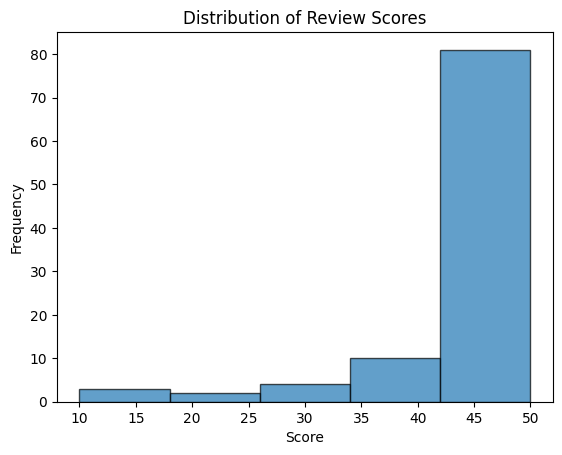

In [87]:
import matplotlib.pyplot as plt

plt.hist(df['score'], bins=5, edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Review Scores')
plt.show()


C:\Users\AlessandroBosi\AppData\Local\Temp\ipykernel_21836\356862810.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='year', y='score', ci=None)


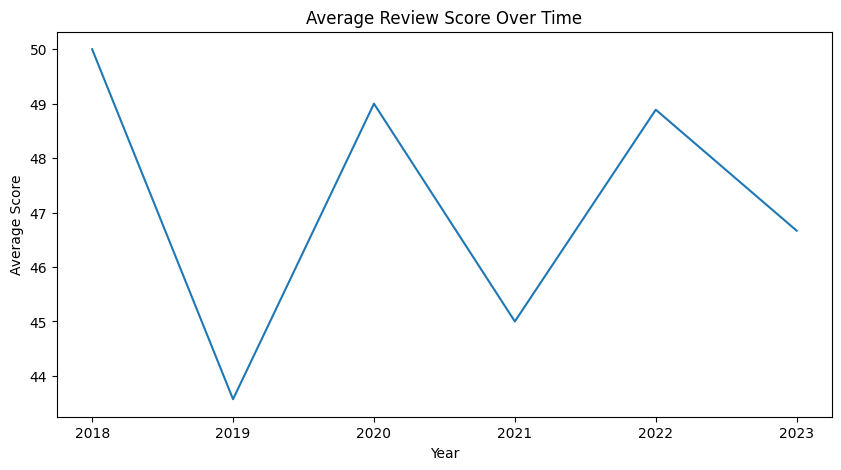

In [91]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='year', y='score', ci=None)
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('Average Review Score Over Time')
plt.show()


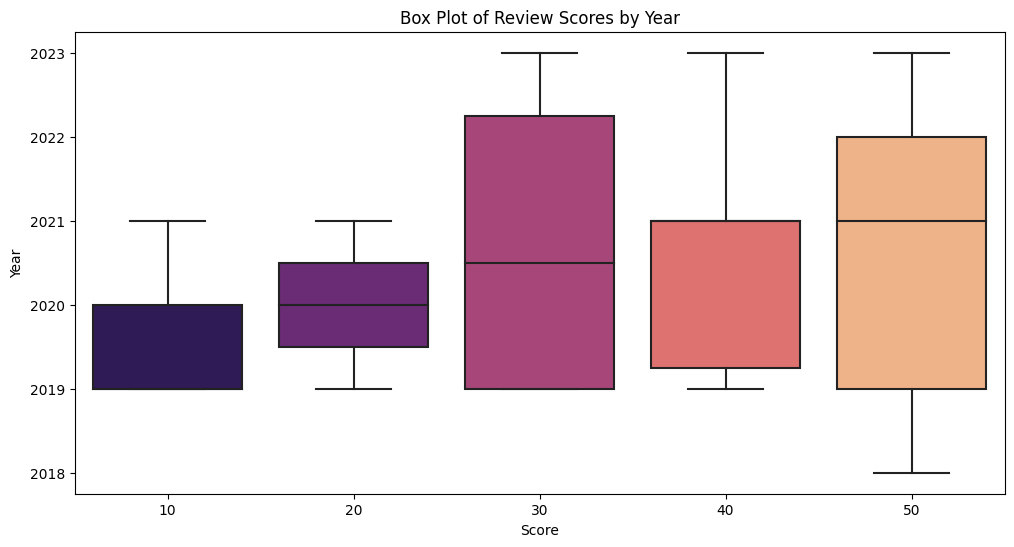

In [107]:
# Create a box plot for scores by year
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='score', y='year', palette='magma')
plt.xlabel('Score')
plt.ylabel('Year')
plt.title('Box Plot of Review Scores by Year')
plt.show()


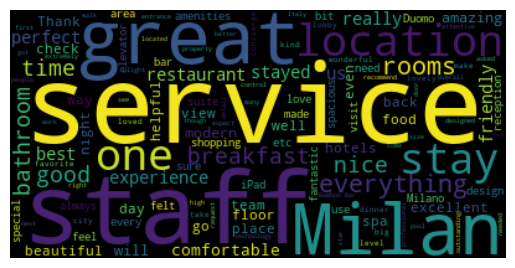

In [123]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(["armani","hotel","room"])
reviews= " ".join(review for review in df.comment)
wordcloud= WordCloud(stopwords=stopwords).generate(reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\AlessandroBosi\AppData\Local\Temp\ipykernel_21836\321672356.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


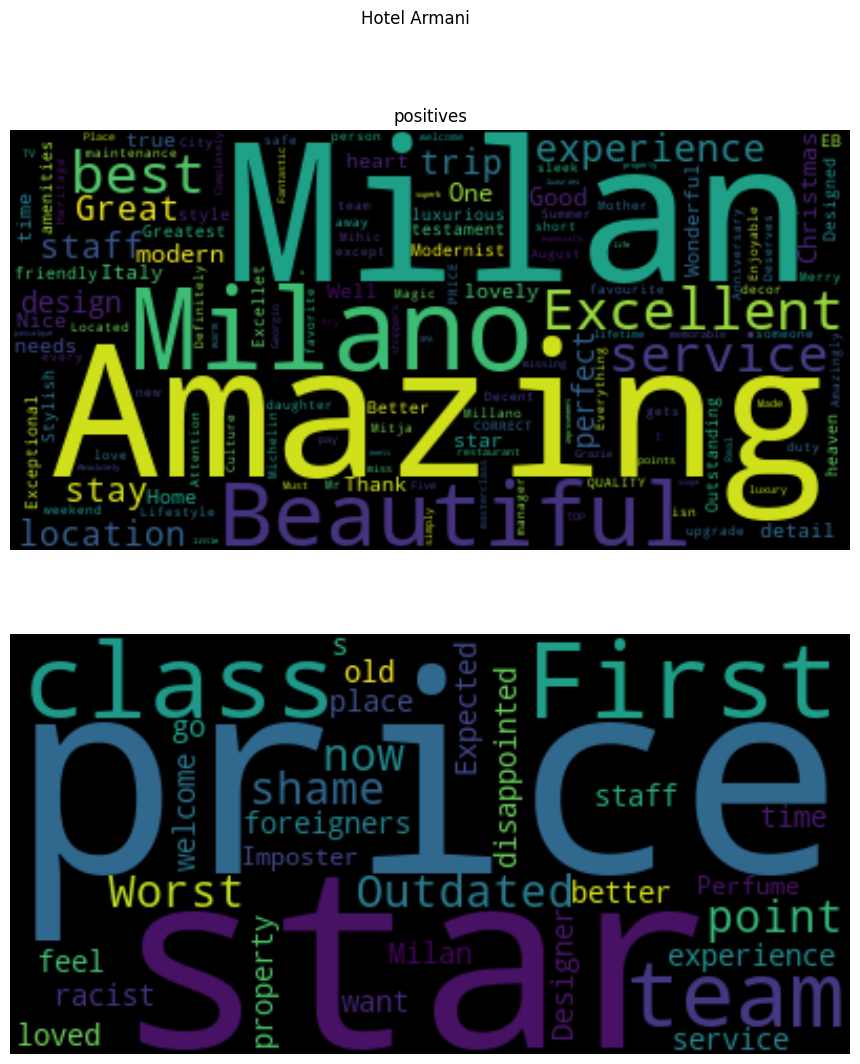

In [126]:
df['sentiment'] = df['score'].apply(lambda rating : +1 if rating > 30 else -1)

positive = df[df['sentiment']==1]
negative = df[df['sentiment']==-1]

pos = " ".join(review for review in positive.title)
wordcloud_pos = WordCloud(stopwords=stopwords).generate(pos)
neg = " ".join(review for review in negative.title)
wordcloud_neg = WordCloud(stopwords=stopwords).generate(neg)

fig,axes = plt.subplots(2,1, figsize=(12,12))
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('positives')
axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].axis('off')
fig.suptitle("Hotel Armani")
fig.show()